#  Analisis del conflicto Palestina/Israel
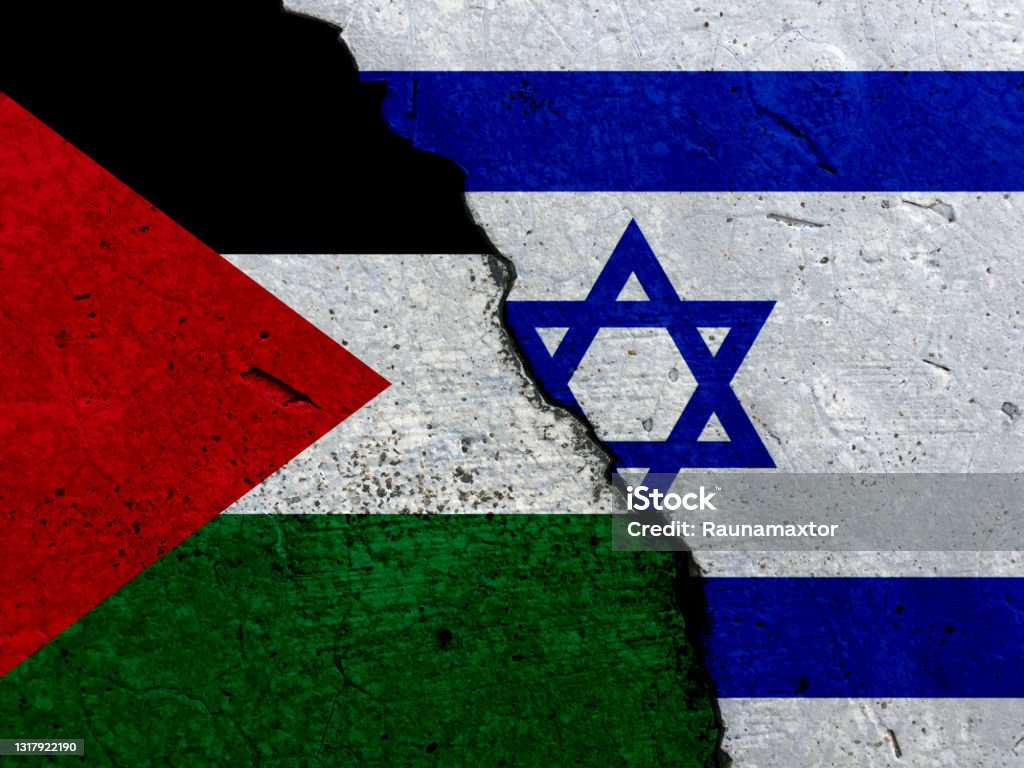
### Estos datos han sido obtenidos en el dataset 'Fatalities in the Israeli-Palestinian conflict' encontrado en Kaggle y llevado a cabo por The Israeli Information Center for Human Rights.Este dataset contiene datos desde el 2000 al 2023. Este análisis lo he realizado con **Python** y he utilizado las librerias pandas,numpy,matplotlib y plotly. Veran varias gráficas en las que se ven las muertes por género, edad, muertes según nacionalidad,ataques por racionalidad, y numero de sucesos por año.

## En primer lugar importamos las librerias que vamos a utilizar y lo leemos

In [1]:
#Desacrga librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
#Leemos el dataset
df=pd.read_csv('/kaggle/input/fatalities-in-the-israeli-palestinian-conflict/fatalities_isr_pse_conflict_2000_to_2023.csv')

# Realizamos en analisis exploratorio del DataFrame y a continuación limpio lo necesario

In [3]:
#Limpieza datos: eliminamos columnas irrelevantes para este análisis en concreto,eliminamos Nan y limpiamos edad ya que aparece como float y queremos un número entero
df = df.drop(['date_of_death','event_location','ammunition','place_of_residence','place_of_residence_district','event_location_region','took_part_in_the_hostilities','notes'], axis =1)
df = df.dropna()
df['age']= df['age'].astype('int16')

#Comprobamos si hay duplicados por el nombre y los eliminamos
df = df.drop_duplicates(df.columns[~df.columns.isin(['name'])],keep = False,inplace=False,ignore_index = True)

#Una vez eliminados los duplicados,quitamos columna name ya que es irelevante para el estuduio
df = df.drop(['name'], axis = 1)

#Realizaremos copia de los datos limpios
df= df.copy()
df

,date_of_event,age,citizenship,event_location_district,gender,type_of_injury,killed_by
0,2023-09-24,32,Palestinian,Tulkarm,M,gunfire,Israeli security forces
1,2023-09-24,21,Palestinian,Tulkarm,M,gunfire,Israeli security forces
2,2023-09-22,16,Palestinian,Jenin,M,gunfire,Israeli security forces
3,2023-09-20,19,Palestinian,Jericho,M,gunfire,Israeli security forces
4,2023-09-19,15,Palestinian,Jenin,M,gunfire,Israeli security forces
...,...,...,...,...,...,...,...
8291,2000-10-19,64,Israeli,Nablus,M,gunfire,Palestinian civilians
8292,2000-10-17,28,Palestinian,Nablus,M,gunfire,Israeli civilians
8293,2000-10-07,36,Israeli,Nablus,M,gunfire,Palestinian civilians
8294,2000-10-07,21,Palestinian,Salfit,M,gunfire,Israeli civilians


In [4]:
#optimización
df.dtypes
df['date_of_event']=df['date_of_event'].astype('string')
df['citizenship']=df['citizenship'].astype('string')
df['event_location_district']=df['event_location_district'].astype('string')
df['type_of_injury']=df['type_of_injury'].astype('string')
df['gender']=df['gender'].astype('string')
df['killed_by']=df['killed_by'].astype('string')
df.dtypes


date_of_event              string[python]
age                                 int16
citizenship                string[python]
event_location_district    string[python]
gender                     string[python]
type_of_injury             string[python]
killed_by                  string[python]
dtype: object

# Pasamos a la visialización de datos
# En primer lugar vemos la cantidad de eventos (asesinatos) que ocurren en cada distrito


In [5]:
#Contamos las muertes ocurridas en cada distrito
df['event_location_district'].value_counts()



event_location_district
Gaza                    1469
North Gaza              1378
Khan Yunis              1004
Rafah                    777
Deir al-Balah            659
Israel                   588
Nablus                   538
Jenin                    412
Ramallah and al-Bira     328
Hebron                   317
Tulkarm                  215
Bethlehem                171
East Jerusalem           121
al-Quds                   83
Qalqiliya                 64
Gush Katif                52
Jericho                   44
Tubas                     39
Salfit                    33
Gaza Strip                 4
Name: count, dtype: Int64

# Creo la gráfica del número de muertes por distrito

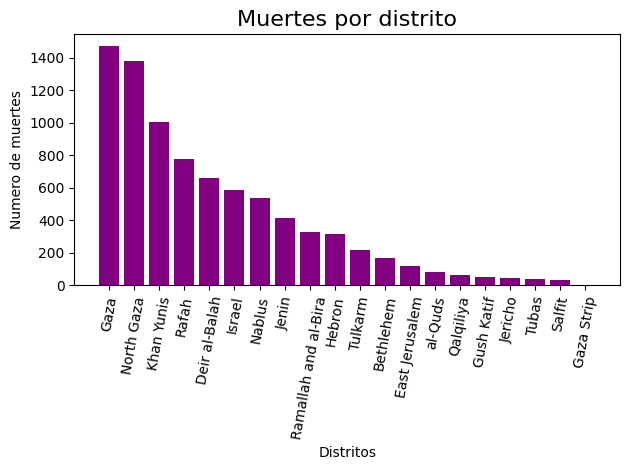

In [6]:
#Creación de un gráfico de barras en relación a las muertes por distrito
plt.bar(
    df['event_location_district'].value_counts().index.tolist(),
    df['event_location_district'].value_counts().tolist(),
    color='purple', width=0.8)
plt.xlabel('Distritos')
plt.ylabel('Numero de muertes')
plt.title('Muertes por distrito',fontsize=16)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()



# Genero un gráfico de tarta para comparar las muertes según el género

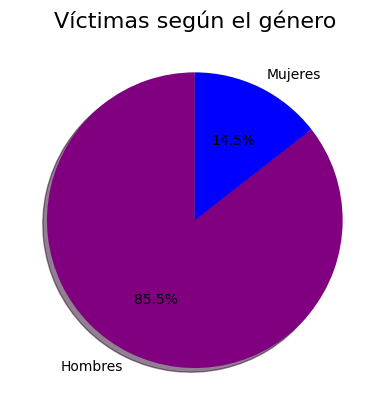

In [7]:
#Pie Chart segun el género de las víctimas

males=(df['gender']=='M')
females=(df['gender']=='F')
males_count = males.sum()
females_count = females.sum()
plt.pie(
[males_count, females_count],
labels = ['Hombres', 'Mujeres'],
shadow = True,
colors = ['purple', 'blue'],
startangle = 90,
autopct = '%1.1f%%'
)
plt.title('Víctimas según el género',fontsize = 16)
plt.show()

# Realizo un gráfico en el que se observa las muertes según los cuatro grupos de edad

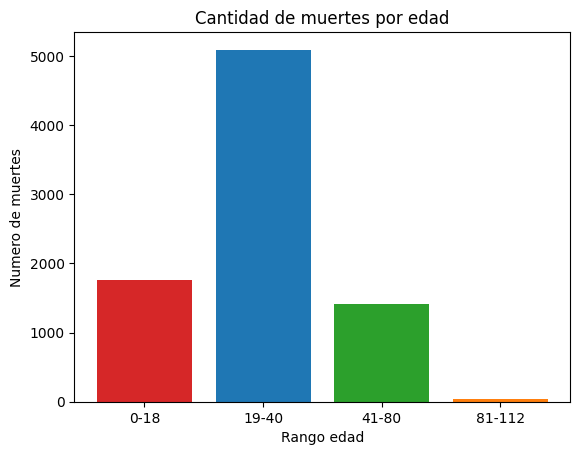

In [8]:
# Gráfica número de muertes por edad
#Comprobamos cuale es la edad mínima y máxima
df['age'].min()
df['age'].max()

# Definir los rangos de edades
bins = [0, 18, 40, 80, float("inf")]

# Definir las etiquetas para los grupos
etiquetas = ['0-18', '19-40', '41-80', '81-112']

# Crear una nueva columna 'grupo_edades' en el DataFrame df
df['grupo_age'] = pd.cut(df['age'], bins=bins, labels=etiquetas, right=False)

#Agrupamos por edad
age_group_counts = df['grupo_age'].value_counts().reindex(etiquetas).fillna(0)

#Realizamos gráfico muertes por edad

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

plt.bar(
    age_group_counts.index,
    age_group_counts.values,
    color=bar_colors,
    width=0.8
)
plt.xlabel("Rango edad")
plt.ylabel("Numero de muertes")
plt.title("Cantidad de muertes por edad")  
plt.show()



# Seguimos con un gráfico en el que vemos los actos(muertes y ataques) según la nacionalidad

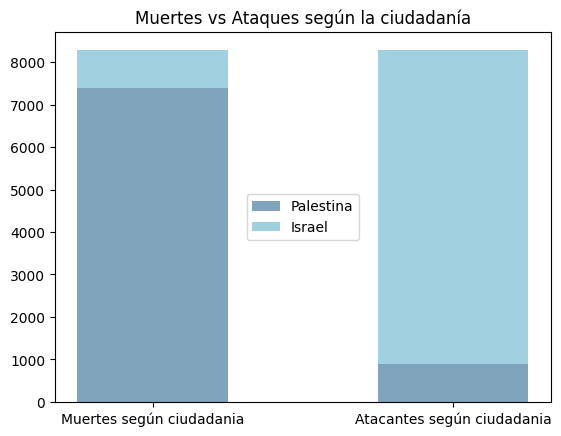

In [9]:
#Gráfica relacionando población israelí o palestina
#Definimos variables
Palestinos = df['citizenship'].value_counts().Palestinian
Israelis=df['citizenship'].value_counts().Israeli
#Creamos nueva columna para poder contar ciudadanía
df['muertos_por_isr_pal'] = np.where(df['killed_by'].str.contains('Israeli'),1,0)
muertos_por_israelis=df['muertos_por_isr_pal'].value_counts()[1]
muertos_por_palestinos=df['muertos_por_isr_pal'].value_counts()[0]
#Creamos gráfica de barras aplicadas
grosor=0.5
grupos = ['Muertes según ciudadania','Atacantes según ciudadania']
valores1 = [Palestinos,muertos_por_palestinos]
valores2 = [Israelis,muertos_por_israelis]

fig, ax = plt.subplots()
ax.bar(grupos, valores1,width=grosor, color = "#024b7a",alpha=0.5,label= 'Palestina')
ax.bar(grupos, valores2,width=grosor,bottom = valores1,color= '#44a5c2',alpha=0.5,label='Israel')
plt.title('Muertes vs Ataques según la ciudadanía')
plt.legend(loc='center')
plt.show()




# Por último, realizo un gráfico interactivo en el que si pasamos el ratón por encima de las barras, podemos ver el numero de muertes por año

In [10]:
#Creamos una nueva columna separando el año de la fecha
df['year'] = pd.to_datetime(df['date_of_event']).dt.year

# Cuenta la frecuencia de cada año
year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

# Crea la figura utilizando Plotly
fig = go.Figure(data=[go.Bar(x=year_counts['year'], y=year_counts['count'])])

# Configura el diseño del gráfico
fig.update_layout(title='Frecuencia de eventos por año',
                  xaxis=dict(title='Año'),
                  yaxis=dict(title='Número de muertes'))

# Muestra el gráfico
fig.show()
